<a href="https://colab.research.google.com/github/abh22/face_recognition/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
! pip install face_recognition


In [15]:
!mkdir known


In [16]:
!wget https://pbs.twimg.com/profile_images/1674815862879178752/nTGMV1Eo_400x400.jpg -O known/bill1.jpg
!wget https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1240w,f_auto,q_auto:best/rockcms/2022-07/220713-bill-gates-jm-1540-7169cd.jpg -O known/bill.jpg


--2024-01-26 09:58:52--  https://pbs.twimg.com/profile_images/1674815862879178752/nTGMV1Eo_400x400.jpg
Resolving pbs.twimg.com (pbs.twimg.com)... 151.101.20.159, 2a04:4e42:5::159
Connecting to pbs.twimg.com (pbs.twimg.com)|151.101.20.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24547 (24K) [image/jpeg]
Saving to: ‘known/bill1.jpg’

known/bill1.jpg     100%[===================>]  23.97K  --.-KB/s    in 0.002s  

2024-01-26 09:58:52 (13.3 MB/s) - ‘known/bill1.jpg’ saved [24547/24547]

--2024-01-26 09:58:52--  https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1240w,f_auto,q_auto:best/rockcms/2022-07/220713-bill-gates-jm-1540-7169cd.jpg
Resolving media-cldnry.s-nbcnews.com (media-cldnry.s-nbcnews.com)... 23.54.37.65, 2600:1409:5000:391::a1d, 2600:1409:5000:382::a1d
Connecting to media-cldnry.s-nbcnews.com (media-cldnry.s-nbcnews.com)|23.54.37.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112557 (110K) [image/jpeg]
Saving t

In [24]:
!wget https://upload.wikimedia.org/wikipedia/commons/7/73/Barack_Obama_in_2016.jpg -O known/obama.jpg

--2024-01-26 10:03:58--  https://upload.wikimedia.org/wikipedia/commons/7/73/Barack_Obama_in_2016.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 69410 (68K) [image/jpeg]
Saving to: ‘known/obama.jpg’

known/obama.jpg     100%[===================>]  67.78K  --.-KB/s    in 0.06s   

2024-01-26 10:03:58 (1.14 MB/s) - ‘known/obama.jpg’ saved [69410/69410]



In [17]:
!mkdir unknown


In [18]:
!wget https://i.insider.com/5ddfa893fd9db26b8a4a2df7 -O unknown/1.jpg

!wget https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg -O unknown/3.jpg


--2024-01-26 09:58:52--  https://i.insider.com/5ddfa893fd9db26b8a4a2df7
Resolving i.insider.com (i.insider.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to i.insider.com (i.insider.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2324104 (2.2M) [image/png]
Saving to: ‘unknown/1.jpg’

unknown/1.jpg       100%[===================>]   2.22M  --.-KB/s    in 0.04s   

2024-01-26 09:58:52 (52.9 MB/s) - ‘unknown/1.jpg’ saved [2324104/2324104]

--2024-01-26 09:58:53--  https://media2.s-nbcnews.com/j/newscms/2017_46/2224911/171113-bill-gates-se-247p_043bd413c63b2a97abf11bfad747538d.fit-760w.jpg
Resolving media2.s-nbcnews.com (media2.s-nbcnews.com)... 23.54.37.65, 2600:1409:5000:391::a1d, 2600:1409:5000:382::a1d
Connecting to media2.s-nbcnews.com (media2.s-nbcnews.com)|23.54.37.65|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://media-cldnry.s-nbcnews.com/image/upload/t_fit-760w

In [27]:
!wget https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1240w,f_auto,q_auto:best/newscms/2017_02/1859796/170109-obama-laugh-rhk-1946p.jpg -O unknown/2.jpg

--2024-01-26 10:12:04--  https://media-cldnry.s-nbcnews.com/image/upload/t_fit-1240w,f_auto,q_auto:best/newscms/2017_02/1859796/170109-obama-laugh-rhk-1946p.jpg
Resolving media-cldnry.s-nbcnews.com (media-cldnry.s-nbcnews.com)... 23.54.37.65, 2600:1409:5000:391::a1d, 2600:1409:5000:382::a1d
Connecting to media-cldnry.s-nbcnews.com (media-cldnry.s-nbcnews.com)|23.54.37.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107853 (105K) [image/jpeg]
Saving to: ‘unknown/2.jpg’

unknown/2.jpg       100%[===================>] 105.33K  --.-KB/s    in 0.02s   

2024-01-26 10:12:04 (6.05 MB/s) - ‘unknown/2.jpg’ saved [107853/107853]



In [28]:
import face_recognition
import cv2
import os
from google.colab.patches import cv2_imshow

def read_img(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

known_encodings = []
known_names = []
known_dir = 'known'

for file in os.listdir(known_dir):
    img_path = os.path.join(known_dir, file)  # Full path to the image file
    img = read_img(img_path)
    img_enc = face_recognition.face_encodings(img)[0]
    #the index 0 is an option to indicate having only one face in the image,so we access the first element of the list
    #face_encodings function return a list of 128 measurments for the face in the image, the list
    #represents the encoding of a face, so similar faces will have similar encodings
    known_encodings.append(img_enc)
    known_names.append(file.split('.')[0])

print("Known Encodings:", known_encodings)
print("Known Names:", known_names)


Known Encodings: [array([-0.01466723,  0.04300085, -0.04319682,  0.04342821, -0.13699017,
       -0.0139492 , -0.04261091, -0.09932081,  0.13109681, -0.07603472,
        0.14375061,  0.00244189, -0.23396161, -0.03738581,  0.00128698,
        0.08853467, -0.16501495, -0.06313713, -0.11280653, -0.08706076,
       -0.06023175, -0.03871022,  0.11784199, -0.01395795, -0.11577161,
       -0.2228688 , -0.12784982, -0.12040626,  0.17087647, -0.05312827,
        0.03460777,  0.06356096, -0.18264115, -0.0801881 ,  0.0385033 ,
        0.12446364, -0.1053071 , -0.06285994,  0.25686979, -0.02553057,
       -0.14580616, -0.00040457,  0.06040955,  0.20528096,  0.25400415,
        0.02212275,  0.01213648, -0.06896198,  0.09633589, -0.21549658,
        0.10933445,  0.18205446,  0.14755313,  0.10795405,  0.05291362,
       -0.10883366,  0.05629668,  0.21909857, -0.12797171,  0.0845099 ,
        0.10047666, -0.0523085 , -0.00555036, -0.00662804,  0.14305426,
        0.06879861, -0.05287957, -0.13999426, 

Processing 1.jpg
Processing 2.jpg


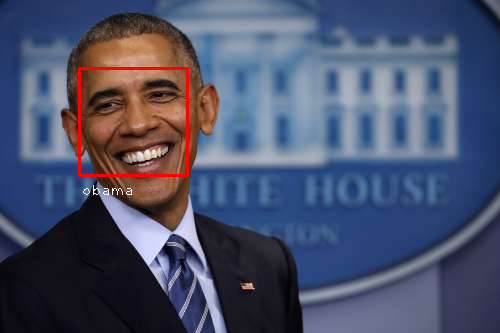

Processing 3.jpg


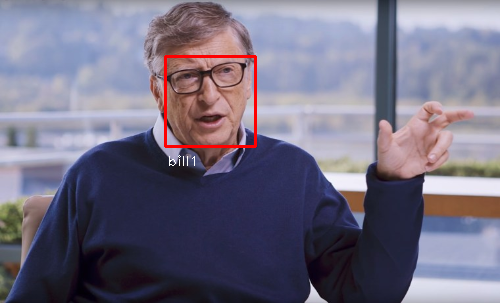

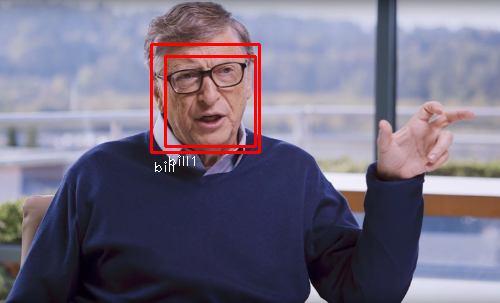

In [29]:
unknown_dir = 'unknown'
for file in os.listdir(unknown_dir):
    print("Processing", file)
    img = read_img(unknown_dir + '/' + file)
    img_enc = face_recognition.face_encodings(img)[0]

    results = face_recognition.compare_faces(known_encodings, img_enc)
    # comapre_faces returns a list of boolean values indicating whether it is a match or not


    for i in range(len(results)):
        if results[i]:
            name = known_names[i]
            (top, right, bottom, left) = face_recognition.face_locations(img)[0]
            cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 2)
            cv2.putText(img, name, (left+2, bottom+20), cv2.FONT_HERSHEY_PLAIN, 1, (255, 255, 255), 1)
            cv2_imshow(img)




